In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)  # Set default figure size

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()  # Display the first few rows of the DataFrame                

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.describe()  # Get a statistical summary of the DataFrame

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.isna().sum()  # Check for missing values in the DataFrame

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.describe(include='all')  # Get a statistical summary of all columns, including non-numeric ones

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


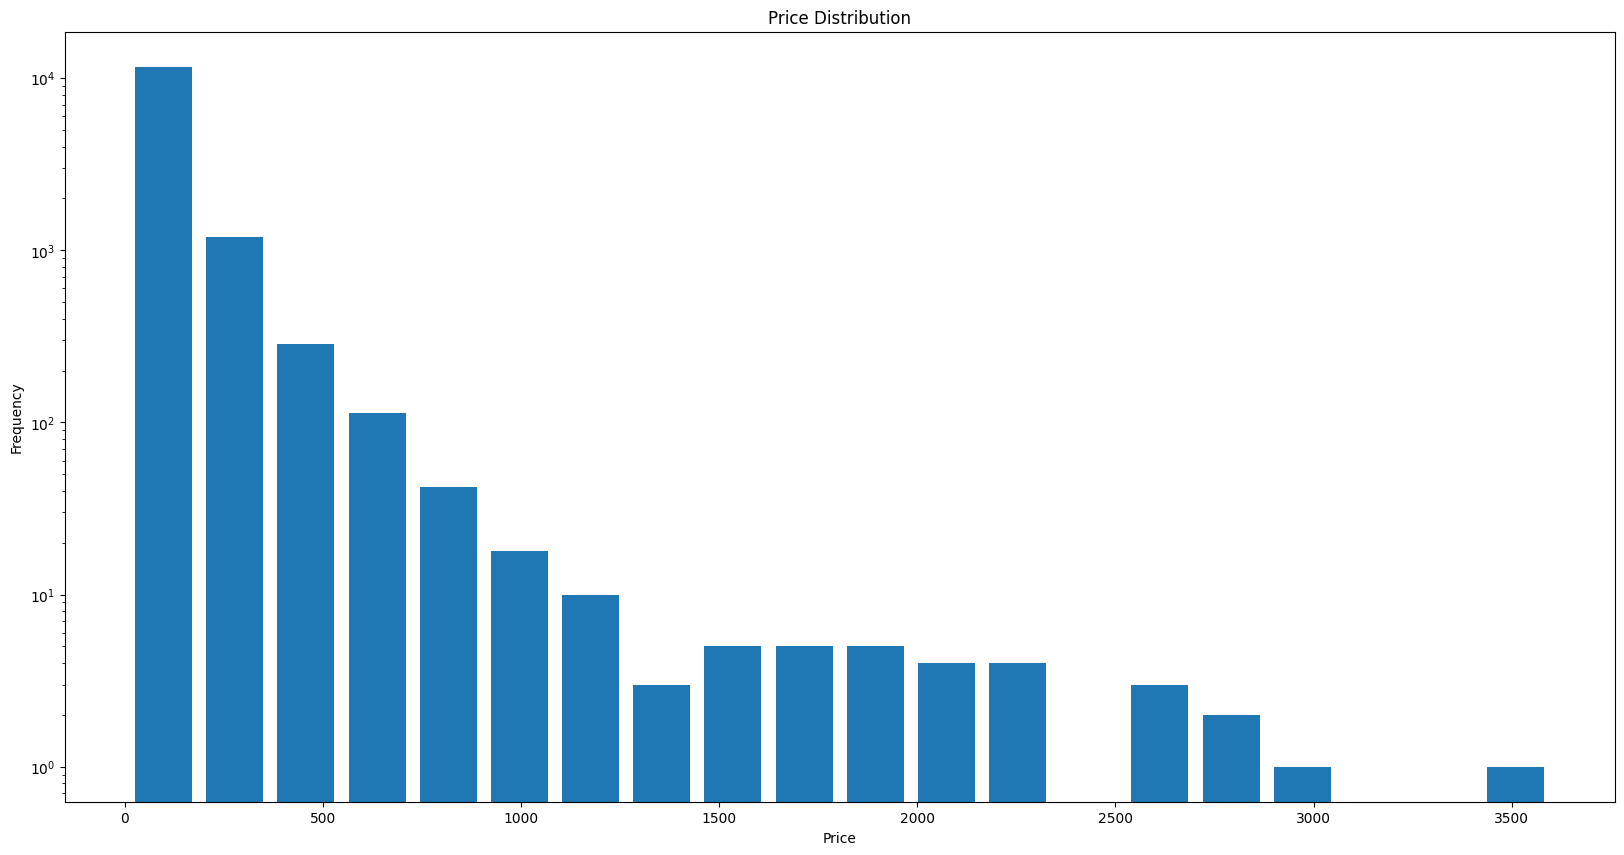

In [7]:
plt.hist(df['price'], bins=20, rwidth=0.8 )  # Replace 'column_name' with the actual column you want to plot
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.yscale('log')  # Use logarithmic scale for better visibility
plt.show()

In [8]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df.groupby('area_type')["area_type"].count().sort_values(ascending=False)  # Count of area types

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [10]:
df2 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')  # Drop unnecessary columns


In [11]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df2.isnull().sum()  # Check for missing values in the cleaned DataFrame

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df2.shape

(13320, 5)

In [14]:
df3 = df2.dropna()  # Drop rows with missing values
df3.shape  # Check the shape of the DataFrame after dropping missing values

(13246, 5)

In [15]:
df3.isnull().sum()  # Verify that there are no missing values left

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df3.describe(include='all')  # Get a statistical summary of the cleaned DataFrame

,location,size,total_sqft,bath,price
count,13246,13246,13246,13246.000000,13246.000000
unique,1304,31,2067,NaN,NaN
top,Whitefield,2 BHK,1200,NaN,NaN
freq,534,5198,843,NaN,NaN
mean,NaN,NaN,NaN,2.692586,112.389392
std,NaN,NaN,NaN,1.341506,149.076587
min,NaN,NaN,NaN,1.000000,8.000000
25%,NaN,NaN,NaN,2.000000,50.000000
50%,NaN,NaN,NaN,2.000000,72.000000
75%,NaN,NaN,NaN,3.000000,120.000000


In [17]:
df3['size'].unique()  # Check unique values in the 'size' column

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))  # Extract the number of bedrooms

/tmp/ipykernel_8266/3989675958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))  # Extract the number of bedrooms


In [19]:
df3.describe()

,bath,price,bhk
count,13246.000000,13246.000000,13246.000000
mean,2.692586,112.389392,2.801902
std,1.341506,149.076587,1.295758
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


In [20]:
df3.sample(5)

,location,size,total_sqft,bath,price,bhk
5324,Anjanapura,3 BHK,1280,2.0,45.0,3
4447,8th Phase JP Nagar,2 BHK,1080,2.0,35.0,2
4444,Whitefield,4 BHK,3252,4.0,280.0,4
9185,Mico Layout,4 Bedroom,3600,4.0,330.0,4
2808,Chikkalasandra,2 BHK,1070,2.0,50.0,2


In [21]:
df3.bhk.unique()  # Check unique values in the 'bhk' column

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [22]:
df3[df3.bhk > 20]  # Check for any outliers in the 'bhk' column

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


/tmp/ipykernel_8266/1739577230.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df3.bhk, df3.price, 'ro', color='blue')  # Plotting the relationship between 'bhk' and 'price'


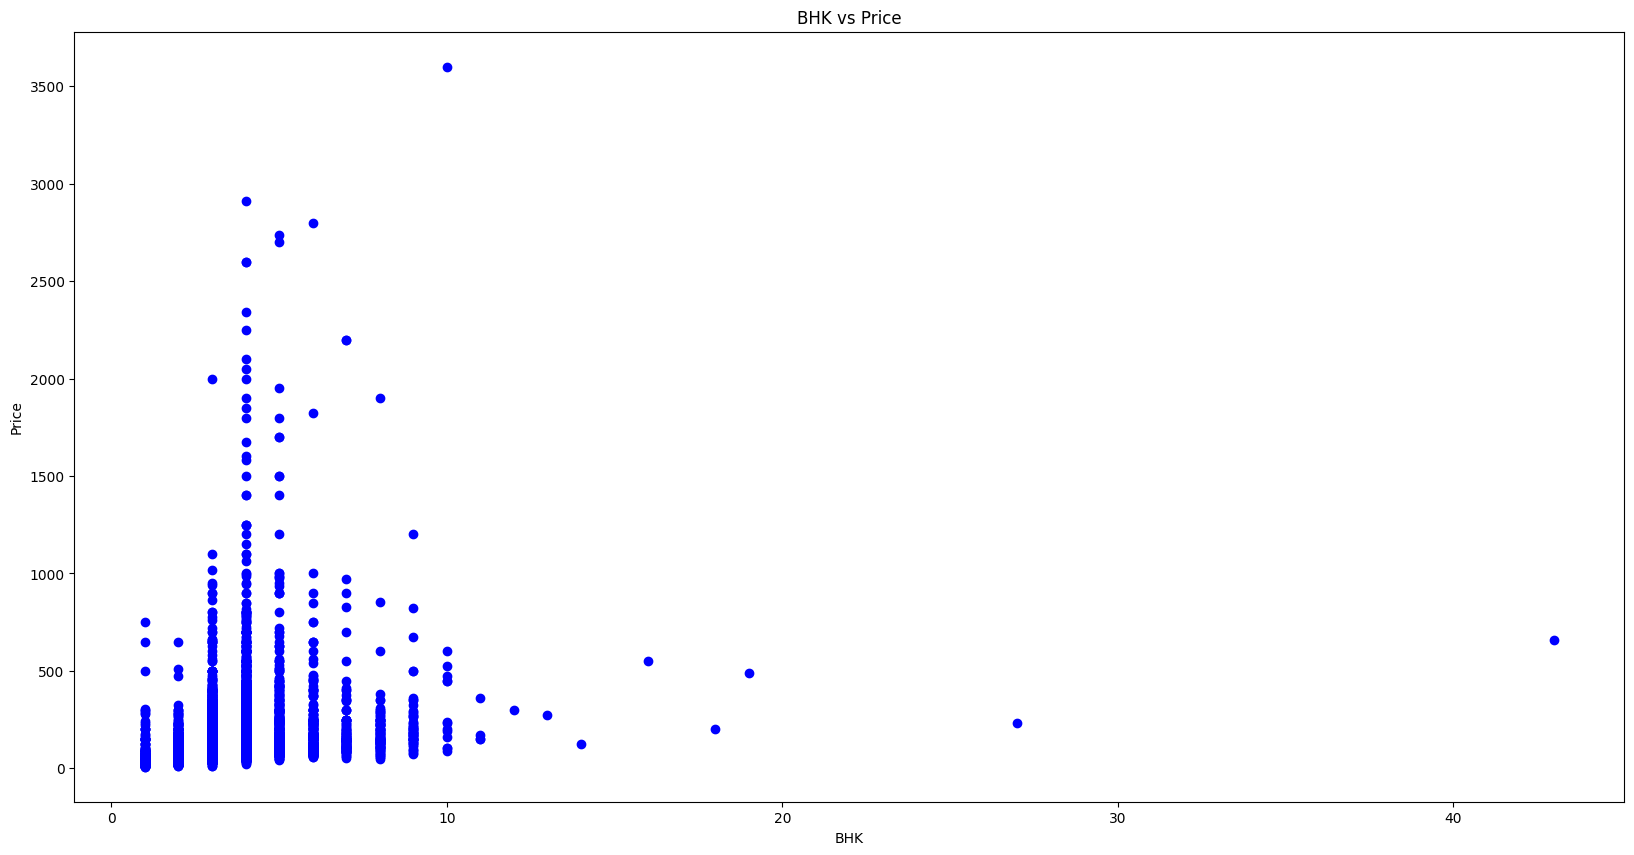

In [23]:
plt.plot(df3.bhk, df3.price, 'ro', color='blue')  # Plotting the relationship between 'bhk' and 'price'
plt.xlabel('BHK')
plt.ylabel('Price')
plt.title('BHK vs Price')
plt.show()

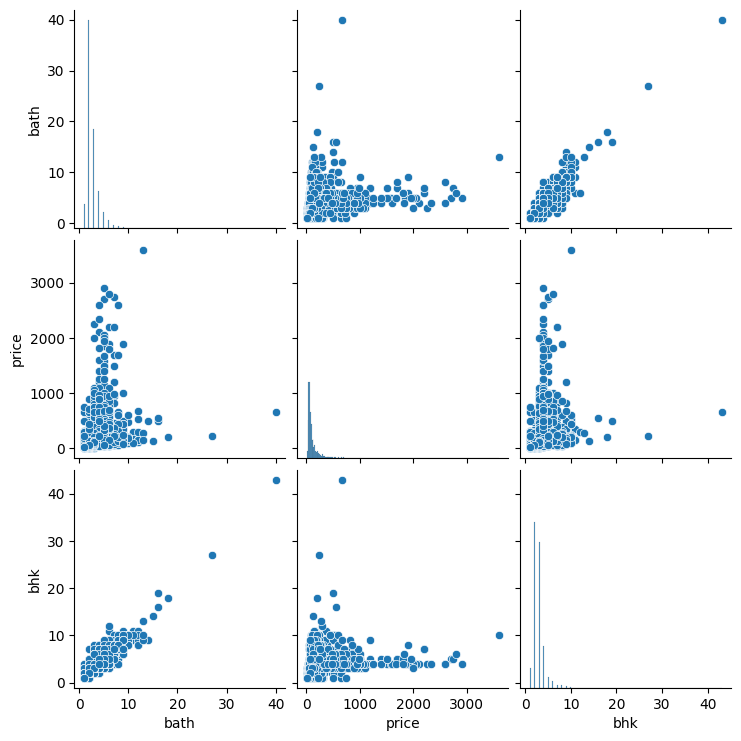

In [24]:
import seaborn as sns
sns.pairplot(df3)  # Pairplot to visualize relationships between variables

In [25]:
df3.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [26]:
df3.total_sqft.unique()  # Check unique values in the 'total_sqft' column

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [27]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [28]:
df3[~df3['total_sqft'].apply(is_float)].sample(10)

,location,size,total_sqft,bath,price,bhk
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
9736,Pragathi Nagar,1 BHK,799 - 803,1.0,33.645,1
12280,Whitefield,4 BHK,2528 - 3188,4.0,137.000,4
3215,KR Puram,2 BHK,1070 - 1315,2.0,51.220,2
11969,Thanisandra,1 BHK,620 - 934,1.0,38.460,1
8477,Hosa Road,1 BHK,615 - 985,1.0,39.990,1
6832,Mysore Road,2 BHK,942 - 1117,2.0,50.855,2
5382,Whitefield,1 BHK,524 - 894,1.0,34.735,1
9183,Hormavu,2 BHK,943 - 1220,2.0,38.665,2
6275,Whitefield,4 BHK,2830 - 2882,5.0,154.500,4


In [29]:
unit_to_sqft = {
    'Sq. Yards': 9.0,
    'Sq. Yard': 9.0,
    'Sq. Yd': 9.0,
    'Sq. ft': 1.0,
    'Sq. Feet': 1.0,
    'Sq. Meter': 10.7639,
    'Sq. M': 10.7639,
    'Acres': 43560.0,
    'Acre': 43560.0,
    'Perch': 272.25,
    'Cent': 435.6,
    'Cents': 435.6,
    'Guntha': 1089.0,
    'Grounds': 2400.0,
    'Ground': 2400.0
}


In [30]:
import re

def parse_area(x):
    # Handle ranges like "2100 - 2850"
    if isinstance(x, str) and '-' in x:
        tokens = x.split('-')
        try:
            return (float(tokens[0].strip()) + float(tokens[1].strip())) / 2
        except:
            return x
    
    # Handle float/int directly
    if isinstance(x, (int, float)):
        return float(x)
    
    if not isinstance(x, str):
        return x

    # Handle unit conversion like "188.89Sq. Yards"
    match = re.match(r'([\d.,]+)\s*([A-Za-z. ]+)', x)
    if match:
        value, unit = match.groups()
        try:
            value = float(value.replace(',', '').strip())
            unit = unit.strip()
            for key in unit_to_sqft:
                if key.lower() in unit.lower():
                    return value * unit_to_sqft[key]
            return x  # Unknown unit
        except:
            return x

    # Handle plain floatable strings like "1200"
    try:
        return float(x)
    except:
        return x


In [31]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(parse_area)

In [32]:
df4.total_sqft.unique()  # Check unique values in the 'total_sqft' column after parsing                 

array([1056.0, 2600.0, 1440.0, ..., 1258.5, 774.0, 4689.0],
      shape=(2007,), dtype=object)

In [33]:
df4.total_sqft.sample(15)               

3086         1260.0
8910         1470.0
12661        1150.0
11292        3730.0
3788         1100.0
12253        2040.0
3801         1560.0
6456         1756.0
6013         2435.0
5114         1884.0
4166          915.0
9734     485.021334
281          1420.0
2623        30000.0
9827          750.0
Name: total_sqft, dtype: object

In [34]:
df4.isna().sum()  # Check for any missing values after parsing      

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [35]:
df4.describe(include='all')  # Get a statistical summary of the DataFrame after parsing                 

,location,size,total_sqft,bath,price,bhk
count,13246,13246,13246.0,13246.000000,13246.000000,13246.000000
unique,1304,31,2007.0,NaN,NaN,NaN
top,Whitefield,2 BHK,1200.0,NaN,NaN,NaN
freq,534,5198,843.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.692586,112.389392,2.801902
std,NaN,NaN,NaN,1.341506,149.076587,1.295758
min,NaN,NaN,NaN,1.000000,8.000000,1.000000
25%,NaN,NaN,NaN,2.000000,50.000000,2.000000
50%,NaN,NaN,NaN,2.000000,72.000000,3.000000
75%,NaN,NaN,NaN,3.000000,120.000000,3.000000


In [36]:
df4[~df4['total_sqft'].apply(is_float)] # Check for any non-float values in 'total_sqft'

,location,size,total_sqft,bath,price,bhk


In [37]:
print(df4['total_sqft'].dtype)

object


In [38]:
df4['total_sqft'] = pd.to_numeric(df4['total_sqft'], errors='coerce') # Convert 'total_sqft' to numeric, coercing errors to NaN

In [39]:
print(df4['total_sqft'].dtype)

float64


In [40]:
df4.describe()  # Get a statistical summary of the DataFrame after parsing

,total_sqft,bath,price,bhk
count,1.324600e+04,13246.000000,13246.000000,13246.000000
mean,1.909255e+03,2.692586,112.389392,2.801902
std,1.732484e+04,1.341506,149.076587,1.295758
min,1.000000e+00,1.000000,8.000000,1.000000
25%,1.100000e+03,2.000000,50.000000,2.000000
50%,1.275000e+03,2.000000,72.000000,3.000000
75%,1.678750e+03,3.000000,120.000000,3.000000
max,1.306800e+06,40.000000,3600.000000,43.000000


In [41]:
pd.set_option('display.float_format', '{:.2f}'.format) # Set display format for floats


In [42]:
df4.describe()  

,total_sqft,bath,price,bhk
count,13246.00,13246.00,13246.00,13246.00
mean,1909.25,2.69,112.39,2.80
std,17324.84,1.34,149.08,1.30
min,1.00,1.00,8.00,1.00
25%,1100.00,2.00,50.00,2.00
50%,1275.00,2.00,72.00,3.00
75%,1678.75,3.00,120.00,3.00
max,1306800.00,40.00,3600.00,43.00


<div style="font-size:2em; font-weight:bold; color:#2c3e50; margin-bottom:10px;">Feature Engineering</div>

In [43]:
df5 = df4.copy()  # Create a copy of the DataFrame for further processing

In [44]:
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']  # Calculate price per square foot

In [45]:
df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13246.00,13246.00,13246.00,13246.00,13246.00
mean,1909.25,2.69,112.39,2.80,7915.28
std,17324.84,1.34,149.08,1.30,106545.23
min,1.00,1.00,8.00,1.00,2.26
25%,1100.00,2.00,50.00,2.00,4262.30
50%,1275.00,2.00,72.00,3.00,5433.10
75%,1678.75,3.00,120.00,3.00,7317.07
max,1306800.00,40.00,3600.00,43.00,12000000.00


In [46]:
df5[df5['total_sqft'] == df5['total_sqft'].max()]  # Check for the maximum 'total_sqft' value

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1086,Narasapura,2 Bedroom,1306800.00,2.00,29.50,2,2.26


In [47]:
len(df5.location.unique())

1304

In [48]:
df5.location = df5.location.apply(lambda x: x.strip())  # Normalize location names

In [49]:
location_stats = df5.groupby('location')['location'].count().sort_values(ascending=False)  # Count of properties per location
location_stats

location
Whitefield              535
Sarjapur  Road          392
Electronic City         304
Kanakpura Road          266
Thanisandra             236
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
Kamdhenu Nagar            1
Kanakadasa Layout         1
K N Extension             1
Name: location, Length: 1293, dtype: int64

In [50]:
len(location_stats)

1293

In [51]:
len(location_stats[location_stats <= 10])  # Count locations with less than 10 properties

1052

In [52]:
location_stats_under_10 = location_stats[location_stats <= 10]  # Get locations with less than or equal to 10 properties
location_stats_under_10

location
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Naganathapura           10
Nagadevanahalli         10
Sector 1 HSR Layout     10
                        ..
Kalhalli                 1
Kalkere Channasandra     1
Kamdhenu Nagar           1
Kanakadasa Layout        1
K N Extension            1
Name: location, Length: 1052, dtype: int64

In [53]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_under_10 else x)  

In [54]:
len(df5.location.unique())  # Check the number of unique locations

242

<div style="font-size:2em; font-weight:bold; color:#2c3e50; margin-bottom:10px;">Outliers</div>